# Palmprint Recognition (Image Classification)
Sumber Dataset: https://www.kaggle.com/datasets/saqibshoaibdz/palmprint100people


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
def load_data(data_dir):
    images = []
    labels = []
    
    print(f"Memuat gambar dari: {data_dir}")
    
    for label_folder in sorted(os.listdir(data_dir)):
        label_path = os.path.join(data_dir, label_folder)
        
        if not os.path.isdir(label_path):
            continue
            
        label = int(label_folder)
        
        for image_file in sorted(os.listdir(label_path)):
            image_path = os.path.join(label_path, image_file)
            
            image = cv2.imread(image_path)
            
            if image is not None:
                images.append(image)
                labels.append(label)
    
    print(f"Selesai. Total gambar dimuat: {len(images)}")
    return np.array(images), np.array(labels)

base_path = '/kaggle/input/palmprint100people/Palmprint/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'valid')

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

Memuat gambar dari: /kaggle/input/palmprint100people/Palmprint/train
Selesai. Total gambar dimuat: 297
Memuat gambar dari: /kaggle/input/palmprint100people/Palmprint/valid
Selesai. Total gambar dimuat: 297


In [3]:
X_val, y_val = [], []
X_test_new, y_test_new = [], []

unique_labels_in_test = np.unique(y_test)

for label in unique_labels_in_test:
    indices = np.where(y_test == label)[0]
    
    label_images = X_test[indices]
    label_labels = y_test[indices]
    
    X_val.extend(label_images[:2])
    y_val.extend(label_labels[:2])
    
    X_test_new.extend(label_images[2:])
    y_test_new.extend(label_labels[2:])

X_val = np.array(X_val)
y_val = np.array(y_val)
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

In [4]:

print("Informasi Data Train")
print(f"Jumlah gambar train: {len(X_train)}")
print(f"Total Subjek/Label Unik: {len(np.unique(y_train))}") 
print(f"Shape dari array gambar train: {X_train.shape}")

print("\nInformasi Data Validasi")
print(f"Jumlah gambar validasi: {len(X_val)}")
print(f"Total Subjek/Label Unik: {len(np.unique(y_val))}")

print("\nInformasi Data Test")
print(f"Jumlah gambar uji: {len(X_test_new)}")
print(f"Total Subjek/Label Unik: {len(np.unique(y_test_new))}")

Informasi Data Train
Jumlah gambar train: 297
Total Subjek/Label Unik: 99
Shape dari array gambar train: (297, 128, 128, 3)

Informasi Data Validasi
Jumlah gambar validasi: 198
Total Subjek/Label Unik: 99

Informasi Data Test
Jumlah gambar uji: 99
Total Subjek/Label Unik: 99


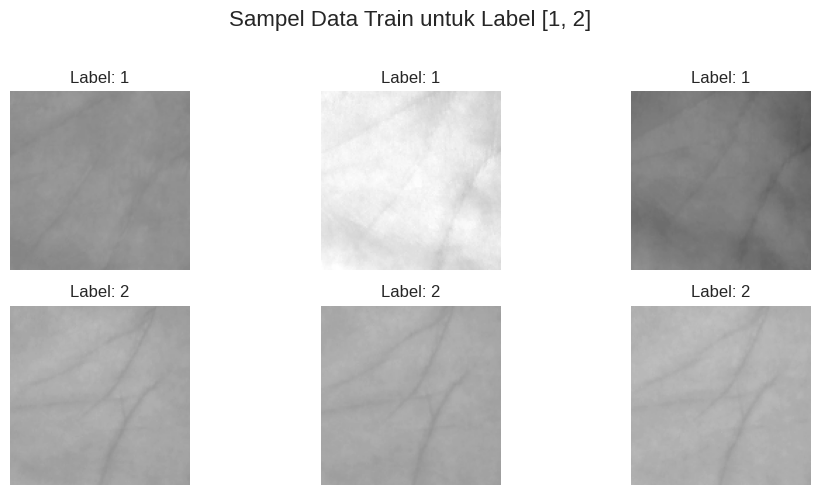

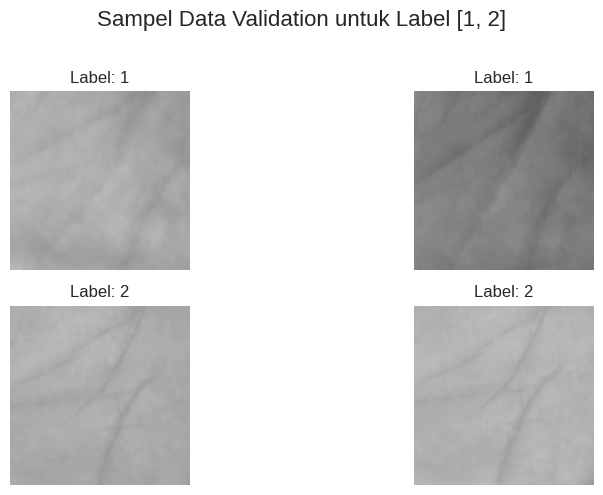

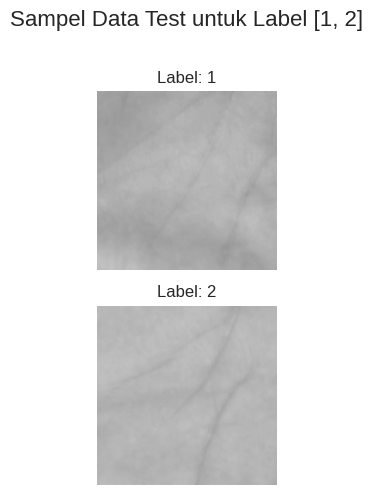

In [5]:
def plot_specific_labels(images, labels, target_labels, dataset_name):
    indices_to_plot = [i for i, label in enumerate(labels) if label in target_labels]
    
    if not indices_to_plot:
        print(f"Tidak ditemukan gambar untuk label {target_labels} di dataset {dataset_name}.")
        return
        
    num_images = len(indices_to_plot)
    cols_per_row = num_images // len(target_labels)
    if cols_per_row == 0: cols_per_row = 1
        
    plt.figure(figsize=(10, 5))
    
    for i, idx in enumerate(indices_to_plot):
        plt.subplot(len(target_labels), cols_per_row, i + 1)
        plt.imshow(images[idx])
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
        
    plt.suptitle(f'Sampel Data {dataset_name} untuk Label {target_labels}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_specific_labels(X_train, y_train, target_labels=[1, 2], dataset_name="Train")

plot_specific_labels(X_val, y_val, target_labels=[1, 2], dataset_name="Validation")

plot_specific_labels(X_test_new, y_test_new, target_labels=[1, 2], dataset_name="Test")

# Eksperimen Pertama

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Normalisasi
X_train_norm = X_train.astype('float32') / 255.0
X_val_norm = X_val.astype('float32') / 255.0
X_test_new_norm = X_test_new.astype('float32') / 255.0

# One-Hot Encoding
num_classes = np.max(y_train) + 1 
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_new_cat = to_categorical(y_test_new, num_classes=num_classes)

2025-09-21 16:48:01.291863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758473281.488989      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758473281.544405      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
input_shape = X_train_norm.shape[1:]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758473294.104045      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758473294.104905      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,405,220 (28.25 MB)

 Trainable params: 7,405,220 (28.25 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_norm,
    y_train_cat,
    epochs=50,
    # batch_size=32,
    validation_data=(X_val_norm, y_val_cat),
)

Epoch 1/50


I0000 00:00:1758473297.572418      63 service.cc:148] XLA service 0x7af9a8003380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758473297.573055      63 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758473297.573081      63 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758473297.823542      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0072 - loss: 5.3156

I0000 00:00:1758473300.428866      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - accuracy: 0.0071 - loss: 5.2671 - val_accuracy: 0.0152 - val_loss: 4.6092
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0138 - loss: 4.6084 - val_accuracy: 0.0152 - val_loss: 4.6053
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0165 - loss: 4.6013 - val_accuracy: 0.0101 - val_loss: 4.6046
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0162 - loss: 4.5864 - val_accuracy: 0.0051 - val_loss: 4.6016
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0180 - loss: 4.5485 - val_accuracy: 0.0000e+00 - val_loss: 4.6038
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0120 - loss: 4.5144 - val_accuracy: 0.0152 - val_loss: 4.6296
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0348 - loss: 4.4697 - val_accuracy: 0.0354 - val_loss: 4.7020
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0299 - loss: 4.4568 - val_accuracy: 0.0303 - val_los

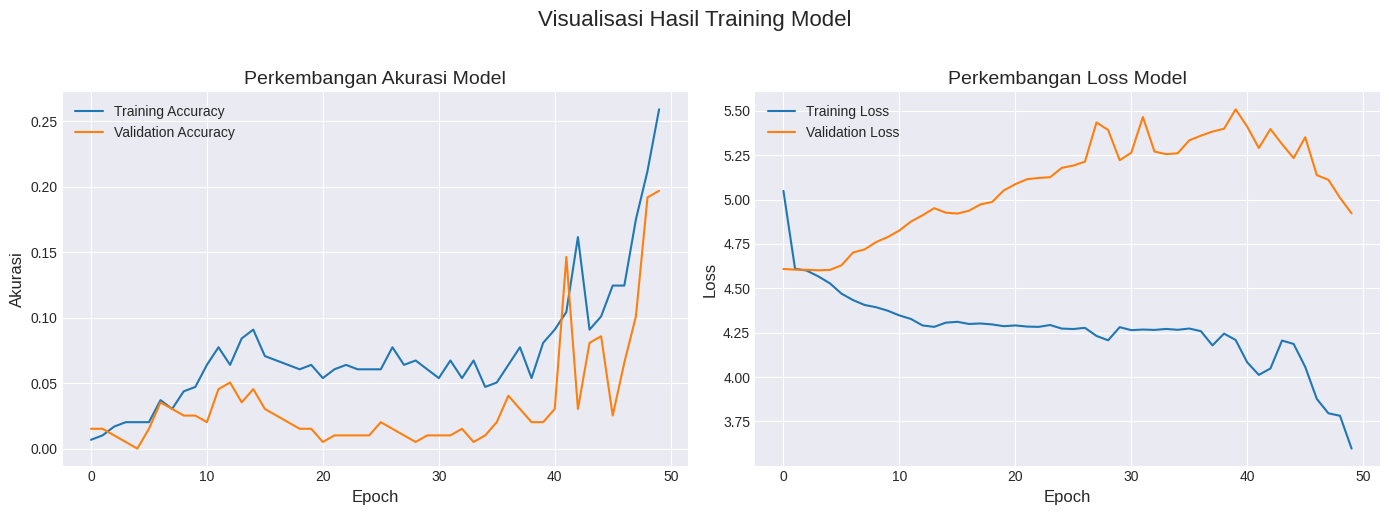

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

history_df = pd.DataFrame(history.history)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_df['accuracy'], '-', label='Training Accuracy')
axes[0].plot(history_df['val_accuracy'], '-', label='Validation Accuracy')
axes[0].set_title('Perkembangan Akurasi Model', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Akurasi', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_df['loss'], '-', label='Training Loss')
axes[1].plot(history_df['val_loss'], '-', label='Validation Loss')
axes[1].set_title('Perkembangan Loss Model', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Visualisasi Hasil Training Model', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test_new_norm)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("--- Classification Report ---")
target_names = [f"Subject {i}" for i in np.unique(y_test_new)]

report = classification_report(y_test_new, y_pred_classes, target_names=target_names, zero_division=0)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
--- Classification Report ---
              precision    recall  f1-score   support

   Subject 1       0.00      0.00      0.00         1
   Subject 2       0.00      0.00      0.00         1
   Subject 3       0.00      0.00      0.00         1
   Subject 4       0.00      0.00      0.00         1
   Subject 5       0.00      0.00      0.00         1
   Subject 6       0.00      0.00      0.00         1
   Subject 7       0.00      0.00      0.00         1
   Subject 8       0.00      0.00      0.00         1
   Subject 9       0.00      0.00      0.00         1
  Subject 10       0.00      0.00      0.00         1
  Subject 11       0.00      0.00      0.00         1
  Subject 12       0.00      0.00      0.00         1
  Subject 13       0.00      0.00      0.00         1
  Subject 14       0.33      1.00      0.50         1
  Subject 15       0.00      0.00      0.00         1
  Subject 16       0.00      0.00      0.00         1
  Subject 17

# Eksperimen Kedua (Hyperparameter tuning)

In [11]:
input_shape = X_train_norm.shape[1:]

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    # Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
])

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,405,220 (28.25 MB)

 Trainable params: 7,405,220 (28.25 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Kompilasi model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(
    X_train_norm,
    y_train_cat,
    epochs=100,
    # batch_size=32,
    validation_data=(X_val_norm, y_val_cat),
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.0080 - loss: 5.4828 - val_accuracy: 0.0101 - val_loss: 4.6267
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0022 - loss: 4.6289 - val_accuracy: 0.0051 - val_loss: 4.6047
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0026 - loss: 4.6119 - val_accuracy: 0.0101 - val_loss: 4.6028
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0224 - loss: 4.5969 - val_accuracy: 0.0101 - val_loss: 4.5983
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0191 - loss: 4.5860 - val_accuracy: 0.0051 - val_loss: 4.5882
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0308 - loss: 4.5330 - val_accuracy: 0.0101 - val_loss: 4.5918
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0333 - loss: 4.4959 - val_accuracy: 0.0202 - val_loss: 4.6303
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0491 - loss: 4.3802 - val_accuracy: 0

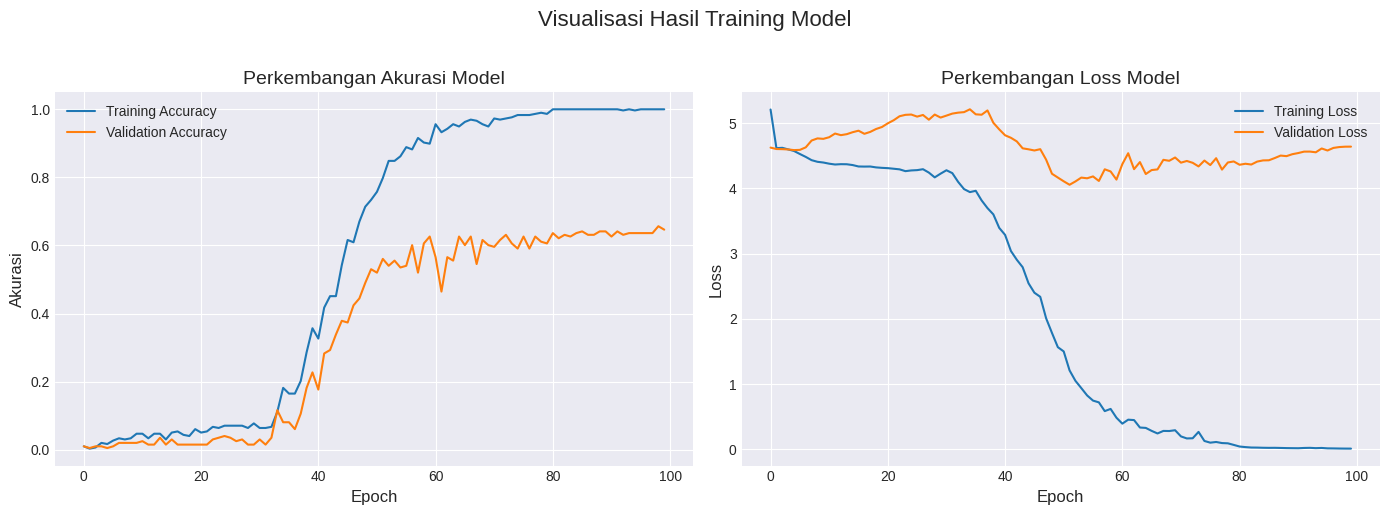

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

history_df_2 = pd.DataFrame(history_2.history)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_df_2['accuracy'], '-', label='Training Accuracy')
axes[0].plot(history_df_2['val_accuracy'], '-', label='Validation Accuracy')
axes[0].set_title('Perkembangan Akurasi Model', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Akurasi', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_df_2['loss'], '-', label='Training Loss')
axes[1].plot(history_df_2['val_loss'], '-', label='Validation Loss')
axes[1].set_title('Perkembangan Loss Model', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Visualisasi Hasil Training Model', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model_2.predict(X_test_new_norm)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("--- Classification Report ---")
target_names = [f"Subject {i}" for i in np.unique(y_test_new)]

report = classification_report(y_test_new, y_pred_classes, target_names=target_names, zero_division=0)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
--- Classification Report ---
              precision    recall  f1-score   support

   Subject 1       0.00      0.00      0.00         1
   Subject 2       0.00      0.00      0.00         1
   Subject 3       1.00      1.00      1.00         1
   Subject 4       0.33      1.00      0.50         1
   Subject 5       0.00      0.00      0.00         1
   Subject 6       0.00      0.00      0.00         1
   Subject 7       0.00      0.00      0.00         1
   Subject 8       0.00      0.00      0.00         1
   Subject 9       0.00      0.00      0.00         1
  Subject 10       0.00      0.00      0.00         1
  Subject 11       0.50      1.00      0.67         1
  Subject 12       0.00      0.00      0.00         1
  Subject 13       0.00      0.00      0.00         1
  Subject 14       1.00      1.00      1.00         1
  Subject 15       0.50      1.00      0.67         1
  Subject 16       0.50      1.00      0.67         1
  Subject 17 

# Eksperimen Ketiga (Praproses)

In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


def load_data(data_dir):
    images = []
    labels = []
    
    print(f"Memuat gambar dari: {data_dir}")
    
    for label_folder in sorted(os.listdir(data_dir)):
        label_path = os.path.join(data_dir, label_folder)
        
        if not os.path.isdir(label_path):
            continue
            
        label = int(label_folder)
        
        for image_file in sorted(os.listdir(label_path)):
            image_path = os.path.join(label_path, image_file)
            
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if image is not None:
                images.append(image)
                labels.append(label)
    
    print(f"Selesai. Total gambar dimuat: {len(images)}")
    return np.array(images), np.array(labels)

base_path = '/kaggle/input/palmprint100people/Palmprint/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'valid')

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

Memuat gambar dari: /kaggle/input/palmprint100people/Palmprint/train
Selesai. Total gambar dimuat: 297
Memuat gambar dari: /kaggle/input/palmprint100people/Palmprint/valid
Selesai. Total gambar dimuat: 297


In [16]:
X_val, y_val = [], []
X_test_new, y_test_new = [], []

unique_labels_in_test = np.unique(y_test)

for label in unique_labels_in_test:
    indices = np.where(y_test == label)[0]
    label_images = X_test[indices]
    label_labels = y_test[indices]
    
    X_val.extend(label_images[:2])
    y_val.extend(label_labels[:2])
    
    X_test_new.extend(label_images[2:])
    y_test_new.extend(label_labels[2:])

X_val = np.array(X_val)
y_val = np.array(y_val)
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

print(f"Bentuk data validasi baru: {X_val.shape}")
print(f"Bentuk data tes baru: {X_test_new.shape}")

Bentuk data validasi baru: (198, 128, 128)
Bentuk data tes baru: (99, 128, 128)


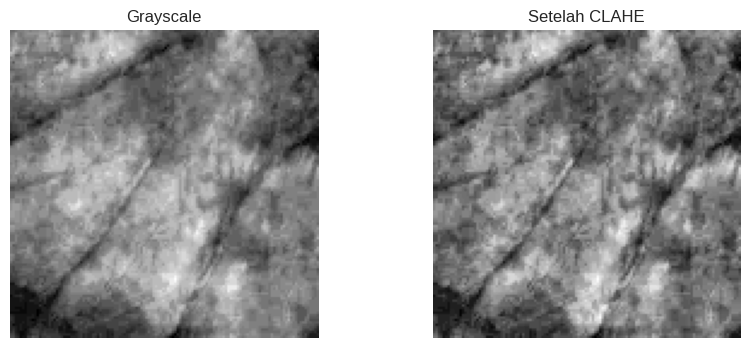

In [17]:

def apply_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    processed_images = []
    for img in images:
        clahe_img = clahe.apply(img)
        processed_images.append(clahe_img)
        
    return np.array(processed_images)

X_train_clahe = apply_clahe(X_train)
X_val_clahe = apply_clahe(X_val)
X_test_new_clahe = apply_clahe(X_test_new)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_train_clahe[0], cmap='gray')
plt.title("Setelah CLAHE")
plt.axis('off')
plt.show()

In [18]:
from tensorflow.keras.utils import to_categorical

X_train_norm = X_train_clahe.astype('float32') / 255.0
X_val_norm = X_val_clahe.astype('float32') / 255.0
X_test_new_norm = X_test_new_clahe.astype('float32') / 255.0

X_train_reshaped = np.expand_dims(X_train_norm, axis=-1)
X_val_reshaped = np.expand_dims(X_val_norm, axis=-1)
X_test_new_reshaped = np.expand_dims(X_test_new_norm, axis=-1)

num_classes = np.max(y_train) + 1 
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_new_cat = to_categorical(y_test_new, num_classes=num_classes)

print("Bentuk data latih setelah reshape:", X_train_reshaped.shape)

Bentuk data latih setelah reshape: (297, 128, 128, 1)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = X_train_reshaped.shape[1:]

model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_3.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_3 = model_3.fit(
    X_train_reshaped, 
    y_train_cat,
    epochs=50,
    # batch_size=32,
    validation_data=(X_val_reshaped, y_val_cat),
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.0073 - loss: 5.2305 - val_accuracy: 0.0202 - val_loss: 4.6075
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0114 - loss: 4.6042 - val_accuracy: 0.0101 - val_loss: 4.6060
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0160 - loss: 4.6059 - val_accuracy: 0.0051 - val_loss: 4.6038
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0145 - loss: 4.6069 - val_accuracy: 0.0051 - val_loss: 4.5910
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0220 - loss: 4.5784 - val_accuracy: 0.0101 - val_loss: 4.5742
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0166 - loss: 4.5396 - val_accuracy: 0.0152 - val_loss: 4.5536
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0181 - loss: 4.4965 - val_accuracy: 0.0354 - val_loss: 4.5167
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0471 - loss: 4.3302 - val_accuracy: 0.0101 - val_loss: 4

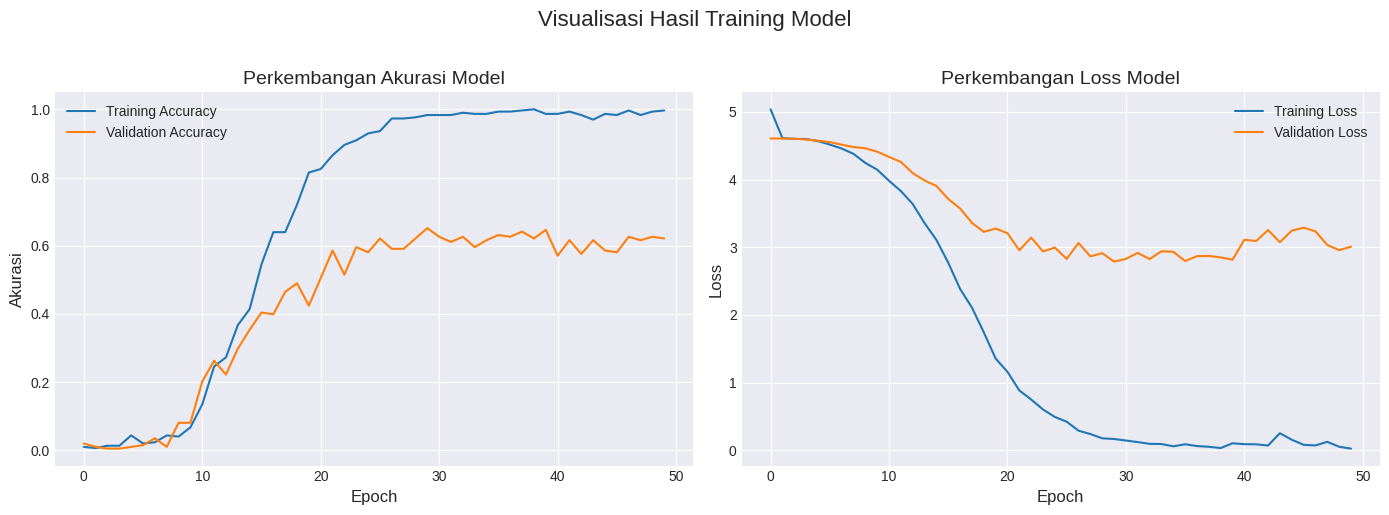

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

history_df_3 = pd.DataFrame(history_3.history)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_df_3['accuracy'], '-', label='Training Accuracy')
axes[0].plot(history_df_3['val_accuracy'], '-', label='Validation Accuracy')
axes[0].set_title('Perkembangan Akurasi Model', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Akurasi', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_df_3['loss'], '-', label='Training Loss')
axes[1].plot(history_df_3['val_loss'], '-', label='Validation Loss')
axes[1].set_title('Perkembangan Loss Model', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Visualisasi Hasil Training Model', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model_3.predict(X_test_new_norm)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("--- Classification Report ---")
target_names = [f"Subject {i}" for i in np.unique(y_test_new)]

report = classification_report(y_test_new, y_pred_classes, target_names=target_names, zero_division=0)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
--- Classification Report ---
              precision    recall  f1-score   support

   Subject 1       0.00      0.00      0.00         1
   Subject 2       1.00      1.00      1.00         1
   Subject 3       0.50      1.00      0.67         1
   Subject 4       0.33      1.00      0.50         1
   Subject 5       0.00      0.00      0.00         1
   Subject 6       0.00      0.00      0.00         1
   Subject 7       0.00      0.00      0.00         1
   Subject 8       0.00      0.00      0.00         1
   Subject 9       0.00      0.00      0.00         1
  Subject 10       0.00      0.00      0.00         1
  Subject 11       0.50      1.00      0.67         1
  Subject 12       0.00      0.00      0.00         1
  Subject 13       0.00      0.00      0.00         1
  Subject 14       1.00      1.00      1.00         1
  Subject 15       0.50      1.00      0.67         1
  Subject 16       1.00      1.00      1.00         1
  Subject 17

# Eksperimen keempat (Pre-trained)

In [22]:
import tensorflow as tf
import numpy as np

X_train_rgb = np.stack([X_train_clahe]*3, axis=-1)
X_val_rgb = np.stack([X_val_clahe]*3, axis=-1)
X_test_new_rgb = np.stack([X_test_new_clahe]*3, axis=-1)

X_train_processed = tf.keras.applications.mobilenet_v3.preprocess_input(X_train_rgb)
X_val_processed = tf.keras.applications.mobilenet_v3.preprocess_input(X_val_rgb)
X_test_new_processed = tf.keras.applications.mobilenet_v3.preprocess_input(X_test_new_rgb)

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_new_cat = to_categorical(y_test_new, num_classes=num_classes)

print("Bentuk data latih setelah diubah ke format RGB:", X_train_processed.shape)

Bentuk data latih setelah diubah ke format RGB: (297, 128, 128, 3)


In [23]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = tf.keras.applications.MobileNetV3Large(input_shape=(128, 128, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_4 = Model(inputs=base_model.input, outputs=predictions)

model_4.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 128, 128,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 64, 64,    │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 64, 64,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 64, 64,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 64, 64,    │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 64, 64,    │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 64, 64,    │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 65, 65,    │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 32, 32,    │        256 │ expanded_conv_1_

 Total params: 3,132,260 (11.95 MB)

 Trainable params: 135,908 (530.89 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [24]:

history_4 = model_4.fit(
    X_train_processed, 
    y_train_cat,
    epochs=25,
    # batch_size=32,
    validation_data=(X_val_processed, y_val_cat),
)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0250 - loss: 4.8708 - val_accuracy: 0.0556 - val_loss: 4.4991
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1242 - loss: 4.3045 - val_accuracy: 0.1162 - val_loss: 4.2355
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2032 - loss: 3.9483 - val_accuracy: 0.1768 - val_loss: 3.9515
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3738 - loss: 3.4751 - val_accuracy: 0.2525 - val_loss: 3.6395
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5109 - loss: 3.0714 - val_accuracy: 0.4192 - val_loss: 3.3019
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6455 - loss: 2.6061 - val_accuracy: 0.4343 - val_loss: 2.9723
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8309 - loss: 2.1114 - val_accuracy: 0.5859 - val_loss: 2.6570
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8790 - loss: 1.7724 - val_accuracy: 0.6111 - va

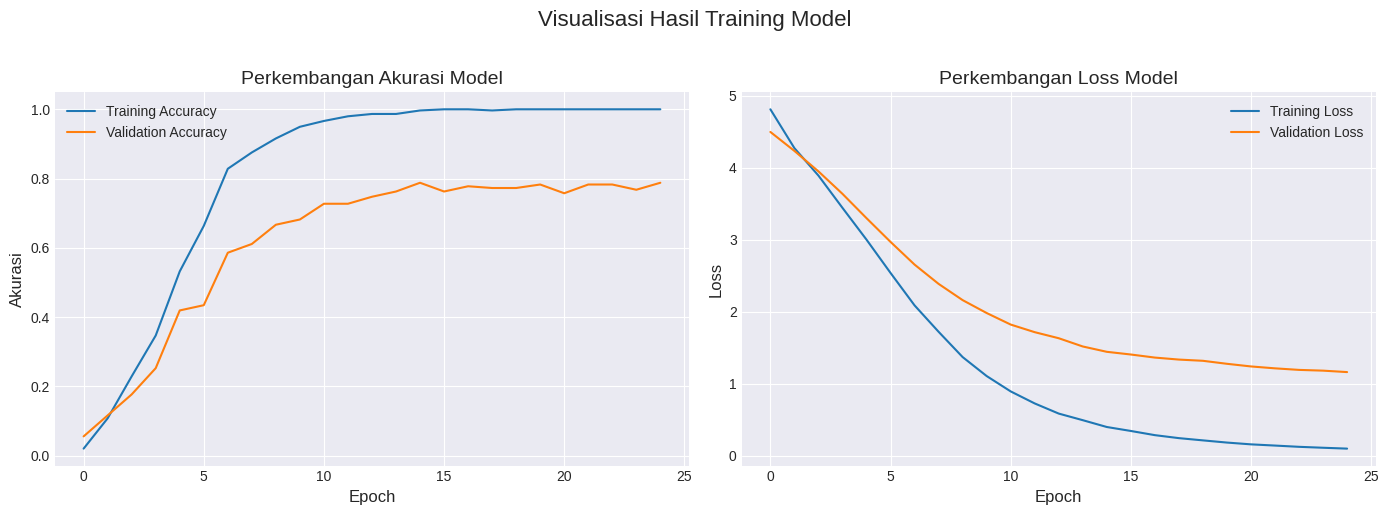

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

history_df_4 = pd.DataFrame(history_4.history)

plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_df_4['accuracy'], '-', label='Training Accuracy')
axes[0].plot(history_df_4['val_accuracy'], '-', label='Validation Accuracy')
axes[0].set_title('Perkembangan Akurasi Model', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Akurasi', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_df_4['loss'], '-', label='Training Loss')
axes[1].plot(history_df_4['val_loss'], '-', label='Validation Loss')
axes[1].set_title('Perkembangan Loss Model', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.suptitle('Visualisasi Hasil Training Model', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model_4.predict(X_test_new_processed)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("--- Classification Report (Eksperimen 4) ---")
target_names = [f"Subject {i}" for i in np.unique(y_test_new)]

report = classification_report(y_test_new, y_pred_classes, target_names=target_names, zero_division=0)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
--- Classification Report (Eksperimen 4) ---
              precision    recall  f1-score   support

   Subject 1       1.00      1.00      1.00         1
   Subject 2       1.00      1.00      1.00         1
   Subject 3       0.50      1.00      0.67         1
   Subject 4       0.33      1.00      0.50         1
   Subject 5       0.00      0.00      0.00         1
   Subject 6       0.50      1.00      0.67         1
   Subject 7       0.00      0.00      0.00         1
   Subject 8       1.00      1.00      1.00         1
   Subject 9       0.00      0.00      0.00         1
  Subject 10       0.00      0.00      0.00         1
  Subject 11       1.00      1.00      1.00         1
  Subject 12       0.50      1.00      0.67         1
  Subject 13       1.00      1.00      1.00         1
  Subject 14       1.00      1.00      1.00         1
  Subject 15       0.00      0.00      0.00         1
  Subject 16       1.00      1.00      1.00         1